In [1]:
import os
import re
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unicodecsv as csv
import seaborn as sns
from collections import Counter
from cycler import cycler
from textwrap import wrap
from IPython.display import display, HTML, Markdown

In [1]:
%%html
<style>
div.float-bar-whh {
    z-index: 10;
    position: fixed;
    bottom: 5px;
    width: 540px;
    left: 50%;
    right: 50%;
    padding-right: 0px;
    padding-left: 0px;
    margin-left: -270px;
    background: #333;
    opacity: 0.7;
    box-shadow: 0 0 2px 0px black;
}
span.new-name-whh {
    height: 100%;
    line-height: 1em;
    margin: 16px 16px 16px 16px;
    border: none;
    font-size: 146.5%;
    color: white;
    text-overflow: ellipsis;
    overflow: hidden;
    white-space: nowrap;
    border-radius: 2px;
    opacity: 1;
}
</style>

<div class="float-bar-whh" style="display:block;">
    <center><span class="new-name-whh">Small banks</span></center>
</div>

# Analysize variables.

In [2]:
# Read documentation.
columns_file = r"../records_documentation.txt"

with open(columns_file,"r") as f:
    columns = f.readlines()
columns
        

['[Column 0] ID\n',
 '[Column 1] Birth year: deduced from education history, where available\n',
 '[Column 2] Gender flag: 1=female, 2=male, 0=unknown\n',
 '[Column 3] Skillset1: primary skillset deduced from self-reported skills\n',
 '[Column 4] Skillset1 weight: the extent to which primary skillset is representative of overall self-reported skills\n',
 '[Column 5] Skillset2: secondary skillset deduced from self-reported skills\n',
 '[Column 6] Skillset2 weight: the extent to which secondary skillset is representative of overall self-reported skills\n',
 '[Column 7] City of profile (does not change): where unavailable, the field is left blank\n',
 '[Column 8] Country of Profile (does not change)\n',
 '[Column 9] Education (highest degree attained): 0=none/unknown; 1=high school; 2=vocational degree; 3=associateÕs; 4=bachelorÕs; 5=masterÕs other than MBA; 6=MBA; 7=doctorate (PhD/JD/MD) [NB: Romanian names not covered]\n',
 "[Column 10] Elite institution: a flag indicating whether any o

So:
- Unique identifier: ID.
- Variable Groups:
    - Column 0-10, profile info; 
    - Column 11-28, employment or education info; (c26 = False or True)
        - Column 11-18, general info;
        - Column 19-25, company info;
        - Column 27-28, school info.

In [3]:
# Define an iterator for reading rows.
def rows_iter(index=True):
    if index:
        for index, (line, ticker) in enumerate(rows_iter(index=False)):
             yield index, line, ticker
    else:
        empl_path = r"../banks_small/"
        empl_file_lst = os.listdir(empl_path)
        for empl_file_name in empl_file_lst:
            empl_file = empl_path+empl_file_name
            ticker = empl_file_name[:-4].upper()
            with open(empl_file,"rb") as f:
                reader = csv.reader(f,encoding='utf-8',escapechar='',delimiter='\t')
                for line in reader:
                    del line[1]
                    yield line, ticker

In [4]:
# Get unique values for each variable.
unique_values = []
for i in range(33):
    unique_values.append(set())
# Get unique values for each variable.
for idx, line, ticker in rows_iter():
    for i in range(33):
        unique_values[i].add(line[i])
for idx, values in enumerate(unique_values):
    print("[Column {}] ".format(idx)+str(len(values)))

[Column 0] 34115
[Column 1] 83
[Column 2] 3
[Column 3] 45
[Column 4] 11275
[Column 5] 45
[Column 6] 11275
[Column 7] 1982
[Column 8] 85
[Column 9] 8
[Column 10] 2
[Column 11] 637
[Column 12] 3
[Column 13] 584
[Column 14] 3
[Column 15] 2
[Column 16] 2559
[Column 17] 96084
[Column 18] 296
[Column 19] 66666
[Column 20] 60499
[Column 21] 2515
[Column 22] 109
[Column 23] 2
[Column 24] 15782
[Column 25] 511
[Column 26] 2
[Column 27] 8
[Column 28] 2
[Column 29] 204
[Column 30] 29
[Column 31] 1872
[Column 32] 34065


In [5]:
# Get unique values for each variable.
unique_values = set()
# Get unique values for each variable.
for idx, line, ticker in rows_iter():
    unique_values.add(line[18])
set(y for x in unique_values for y in x.split(','))

{'',
 'ACCOUNTING',
 'BUSINESS',
 'HR',
 'LEGAL',
 'MANAGEMENT',
 'MARKETING',
 'OPERATIONS',
 'OVERSIGHT',
 'PRODUCTION',
 'TECHNOLOGY',
 'TEHNOLOGY'}

In [6]:
# One block to convert data to pd.DataFrame.
entries_lst = []
for idx, line, ticker in rows_iter():
    if idx == 20: # Control number of rows.
        break
    entries_lst.append([ticker]+line)

samples_lst = entries_lst
entries_df = pd.DataFrame(data=entries_lst)
#entries_df


In [7]:
# Get an example.
entry = samples_lst[3]
for i in range(len(entry)):
    print("[Column {}] ".format(i)+entry[i])

[Column 0] BOH
[Column 1] 27a2c98b-cbdf-3733-b3ac-292c97fdca45
[Column 2] 1967
[Column 3] 2
[Column 4] Web Development
[Column 5] 0.9371178776975788
[Column 6] Software Engineering
[Column 7] 0.05574293179166471
[Column 8] 
[Column 9] United States
[Column 10] 4
[Column 11] False
[Column 12] 1991-05-01
[Column 13] True
[Column 14] 2000-05-01
[Column 15] True
[Column 16] False
[Column 17] 3288
[Column 18] Software Engineer,software engineer
[Column 19] TECHNOLOGY
[Column 20] Bank of Hawaii
[Column 21] Bank of Hawaii
[Column 22] BOH
[Column 23] XNYS
[Column 24] True
[Column 25] 
[Column 26] 522110
[Column 27] False
[Column 28] 
[Column 29] False
[Column 30] 
[Column 31] 
[Column 32] BBG000C8D8G9
[Column 33] 1538421236347


# Aggregate employment changes to the firm-by-date level.

Definition of employment change types: When only employment records are considered, an employment change will be recognized as
- `hiring` if it changed its company to one of the companies (listed [here](#company_lst));
- `firing` if it changed its company from one of the companies to `TIME_OFF` and stayed in `TIME_OFF` for more than 100 days;
- `leaving` if it changed its company from one of the companies and not recogized as `firing`.

In [8]:
# Define a class to read and process entries.
class entryProcessor:    
    
    def __init__(self, person_id, ticker=None):
        self.person_id = person_id
        self.profile = [None]*7 # "birth_year","gender","skill1","skill2","country","education_level","f_elite"
        self.employment = [None]*7 # "start_date","end_date","ticker","f_current","job_role","department", "nth_posit"
        self.ticker = ticker
        
    # Three functions to output records.
    # Varlist: Hiring/Leaving/Firing, Ticker, year-month, profile_info: [...], next_industry.
    def enter_record(self):
        return ['hiring',self.employment[2],self.employment[0]
               ]+self.profile+[self.employment[4],self.employment[5]
                              ]+['']+['',''] 
    def leave_record(self,next_industry):
        return ['leaving',self.employment[2],self.employment[1]
               ]+self.profile+[self.employment[4],self.employment[5]
                              ]+[next_industry]+[entryProcessor.time_diff(self.employment[1],self.employment[0]),
                                                 self.employment[6]]
    def fired_record(self):
        return ['firing',self.employment[2],self.employment[1]
               ]+self.profile+[self.employment[4],self.employment[5]
                              ]+['']+[entryProcessor.time_diff(self.employment[1],self.employment[0]),
                                      self.employment[6]]
    
    # When id changes, record a possible leave and then clear contents.
    def reinitialize(self,entry):
        if self.employment[3]=="False":
            record = self.leave_record('')
        else:
            record = None
        self.__init__(entry[0],self.ticker)
        self.profile = [entry[x] for x in [1,2,3,5,8,9,10]]
        if entry[6] is not None:
            self.profile[3] = '' if float(entry[6])<0.1 else entry[5]
        return record
    
    # Main method: read and process.
    def read(self,entry,ticker):
        record = []
        self.ticker = ticker
        # Reinitialize when id changes.
        if self.person_id != entry[0]:
            leave_last = self.reinitialize(entry)
            if leave_last is not None:
                record.append(leave_last)
        # Then deal with the current entry.
        if entry[3] != "-1" and entry[26] == "False" and not sum([
            re.search(r"(?i)\W{}\W".format(x)," "+entry[17]+" ") is not None for x in ["intern","internship","trainee","student","summer"]
        ]):
            if self.employment[2] != entry[21]:
                if self.employment[2] == self.ticker:
                    if entry[25] == "TIME_OFF" and int(entry[16]) > 100:
                        record.append(self.fired_record())
                    else:
                        record.append(self.leave_record(entry[25]))
                self.employment = [None]*7
                if entry[21] == self.ticker:
                    self.employment[0] = entryProcessor.convert_time(entry[11],entry[12])
                    self.employment[1] = entryProcessor.convert_time(entry[13],entry[14])
                    self.employment[2] = entry[21]
                    self.employment[3] = entry[15]
                    self.employment[4] = entry[17]
                    self.employment[5] = entry[18]
                    self.employment[6] = 0
                    record.append(self.enter_record())
            else:
                self.employment[1] = entryProcessor.convert_time(entry[13],entry[14])
                self.employment[3] = entry[15]
                self.employment[6] += 1
        return record
            
    # Unbound methods.
    def convert_time(date,f_valid_month):
        date_regex = re.match(r"(\d{4})-(\d{2})-\d{2}",date)
        if date_regex is None:
            return None
            #raise ValueError('Not a proper date: {}'.format(date))
        else:
            return date_regex.group(1)+('00' if f_valid_month == 'False' else date_regex.group(2))
    
    def time_diff(end_date,start_date):
        if end_date is not None and start_date is not None:
            edt, sdt = int(end_date), int(start_date)
            yr_diff = edt//100-sdt//100
            emth = edt%100
            smth = sdt%100
            if not yr_diff and not (emth and smth):
                return min(6,(emth-smth-1)%12+1)
            else:
                return yr_diff*12+(emth if emth else 6)-(smth if smth else 6)
        else:
            return np.nan
        
    # For print.
    def __str__(self):
        return "[person_id: {}, profile: {}, employment: {}]".format(self.person_id, self.profile, self.employment)
            
#entry = entryProcessor(None)
#for i in range(50):
#    print(i)
#    print(entry.read(samples_lst[i]))
#    print(entry)

In [9]:
# Read, Identify & Aggregate.

## Initialize.
career = entryProcessor(None)

## Iterate.
empl_changes_lst = []
for idx, entry, ticker in itertools.chain(rows_iter(),[(None,[None]*33,"")]):
    if idx == np.inf: # End point.
        break
    ticker = {"BOH":"BOH","FITB":"FITB","SNV":"SNV","SVB":"SIVB","UMP":"UMPQ","":None}[ticker]
    empl_change_this = career.read(entry, ticker)
    if empl_change_this != []:
        empl_changes_lst += empl_change_this

varlist = [
    "type","ticker","yrmth","birth","gender","skill1","skill2","cntry","edu","f_elite",
    "job_role","depmt","ind_next","tenure","nprom"
]
empl_changes_df = pd.DataFrame(data=empl_changes_lst,columns=varlist)
empl_changes_df["ticker"] = "All"
empl_changes_df


,type,ticker,yrmth,birth,gender,skill1,skill2,cntry,edu,f_elite,job_role,depmt,ind_next,tenure,nprom
0,hiring,All,199105,1967,2,Web Development,,United States,4,False,"Software Engineer,software engineer",TECHNOLOGY,,,
1,leaving,All,200005,1967,2,Web Development,,United States,4,False,"Software Engineer,software engineer",TECHNOLOGY,,108,0
2,hiring,All,200806,1980,2,Non-Profit and Community,Administration,United States,5,False,"Teller I,teller,i",,,,
3,leaving,All,201008,1980,2,Non-Profit and Community,Administration,United States,5,False,"Teller I,teller,i",,,26,0
4,hiring,All,199401,1952,1,Banking and Finance,,United States,6,True,"Senior Vice President,senior vice president",,,,
5,firing,All,199801,1952,1,Banking and Finance,,United States,6,True,"Senior Vice President,senior vice president",,,48,0
6,hiring,All,201603,1993,1,Administration,Business Development,United States,1,False,"Customer Service Representative,customer servi...",MARKETING,,,
7,leaving,All,201605,1993,1,Administration,Business Development,United States,1,False,"Customer Service Representative,customer servi...",MARKETING,,2,0
8,hiring,All,201203,1984,1,Video and Film Production,Real Estate,United States,4,False,"Mortgage Financing Assistant (Temp),assistant,...",ACCOUNTING,,,
9,leaving,All,201208,1984,1,Video and Film Production,Real Estate,United States,4,False,"Mortgage Financing Assistant (Temp),assistant,...",ACCOUNTING,,5,0


A block prepared for counting annual employment.

In [10]:
ticker_this = None
res_dict = {}
for idx, entry, ticker in rows_iter():
    if idx == np.inf: # End point.
        break
    ticker = {"BOH":"BOH","FITB":"FITB","SNV":"SNV","SVB":"SIVB","UMP":"UMPQ","":None}[ticker]
    if ticker != ticker_this:
        ticker_this = ticker
        res_dict[ticker] = Counter([])
    if entry[21] == ticker_this and entry[3] != "-1" and entry[26] == "False" and not sum([
        re.search(r"(?i)\W{}\W".format(x)," "+entry[17]+" ") is not None for x in ["intern","internship","trainee"]
    ]):
        if entry[11] != "None" and (entry[13] != "None" or entry[15] == "True"):
            res_dict[ticker] += Counter(
                range(
                    pd.to_datetime(entry[11]).year,
                    pd.to_datetime(entry[13]).year if entry[13]!="None" else 2019
                )
            )

empl_by_years = pd.DataFrame(res_dict).fillna(0).unstack().reset_index()
empl_by_years.columns = ["ticker", "year", "employment"]
empl_by_years["ticker"] = "All"
empl_by_years = empl_by_years.groupby(["ticker", "year"]).sum().reset_index()

# Summarize and plot.

<a id='company_lst'></a>
**For ALL positions in:**
- **BOH**: Bank of Hawaii.
- **FITB**: Fifth third bank.
- **SNV**: Synovus bank.
- **SIVB**: Sillicon valley bank.
- **UMPQ**: Umpqua bank.

All firms are combined in the following analysis due to the small number of employees.

In [11]:
# Colors.
color_styles = ['g','r','c','m','y']
line_styles = ['-','--','-']
marker_styles = ['o','^','^']
xlefts = [1990]

In [12]:
# A iterator for plots.
number_of_uniques = len(empl_changes_df["ticker"].unique())
def iterator_for_axis(col=1, one_size=(12,6), rep_time=1, number_once=number_of_uniques, fig_func=None):
    all_needs=number_once*rep_time
    row=-(-all_needs//col)
    fig, axs = plt.subplots(row,col,figsize=(one_size[0]*col, one_size[1]*row))
    if col>1 and row>1:
        axs=[x for y in axs for x in y]
    elif col==1 and row==1:
        axs=[axs]
    if fig_func is not None:
        fig_func(fig)
    for ax in axs[all_needs:]:
        ax.axis('off')
    return iter(axs)

In [13]:
# Deal with 'yrmth'.
empl_changes_df = empl_changes_df.assign(
    year = lambda df:df.yrmth.apply(lambda x:int(x[:4]) if x is not None else np.nan),
    month = lambda df:df.yrmth.apply(lambda x:int(x[4:]) if x is not None else -1)
)

empl_changes_df.describe(include=[np.object])

,type,ticker,yrmth,birth,gender,skill1,skill2,cntry,edu,f_elite,job_role,depmt,ind_next,tenure,nprom
count,19959,19959,19324,19959,19959,19959,19959,19959,19959,19959,19959,19959,19959,19631,19959
unique,3,1,506,78,3,43,44,56,8,2,5978,118,260,299,8
top,hiring,All,200500,2000,2,Banking and Finance,,United States,4,False,"Customer Service Representative,customer servi...",,,,
freq,11772,19959,190,4205,8521,7415,5632,19496,11052,19233,960,8223,14491,11772,11772


## Count the number of employees from Dec., 1989 on.

Note: 
- This block counts the number of currently employment for the firms by calculating the cumulative sums of the net employment increase, that is, hiring minus the sum of firing and leaving.
- This method is not effective for the early years. However, if we can assure that we have all the resumes after some time, we will have the correct number after all the employment before that time have left the company. We assume that the number is correct after 1989 except the most recent years.
- All the numbers are counted in the end of the year and will be used to calculate the proportion of the employment changes for next year. Note that we do not calculate monthly employment separately since there are a good proportion of our data with invalid months.

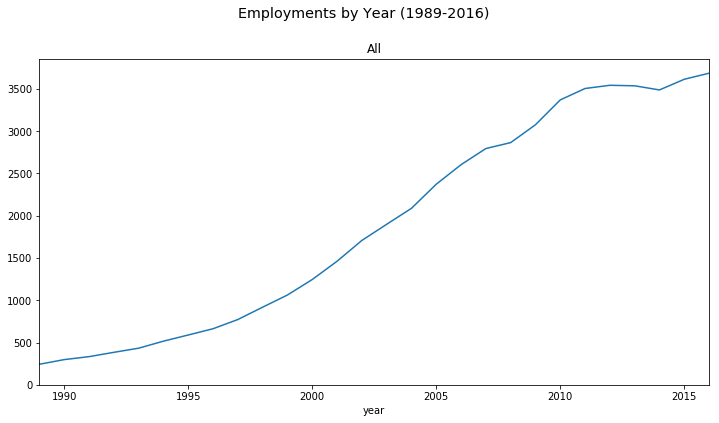

In [14]:
# count_by_years = pd.DataFrame({'count':empl_changes_df.groupby(['ticker','type','year']).size()}).reset_index()
# empl_by_years = count_by_years.groupby(['ticker','type']).apply(
#     lambda df:df.sort_values(['year']).assign(cumsum = lambda df2:df2['count'].cumsum()) # Calculate cumsum.
# ).reset_index(drop=True).pivot_table(
#     index=['ticker','year'],columns='type',values=['cumsum'],fill_value=0 # Reshape to wide format.
# ).assign(
#     employment=lambda df:(df['cumsum']['hiring']-df['cumsum']['firing']-df['cumsum']['leaving']) # Get employment.
# ).drop('cumsum',axis=1).reset_index()
# empl_by_years.columns = empl_by_years.columns.droplevel('type')

# Plot.
for (ticker, col), ax in zip(
    empl_by_years.pivot_table(
        index='year',columns='ticker',values='employment',fill_value=0
    ).loc[lambda df:(df.index>=1989)&(df.index<=2016)].iteritems(),
    iterator_for_axis(fig_func=lambda x:x.suptitle("Employments by Year (1989-2016)",fontsize="x-large",y=1))
):
    col.plot(ax=ax, title=ticker).set_ylim(bottom=0)

plt.show()

## Overall trends.
Note: Plots by year and plots by months do not only differ in frequency, but also in sample size. This is due to the entries without valid month record.

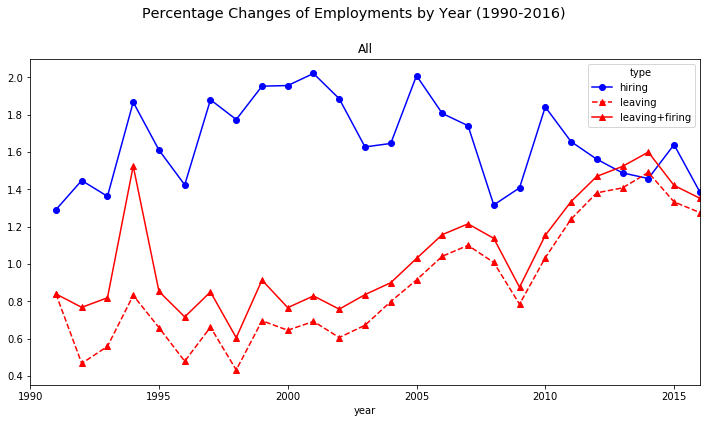

In [15]:
# Count and calculate percentages of employment changes.
prop_by_months = pd.DataFrame(
    {'count':empl_changes_df.groupby(['ticker','type','year','month']).size()} # Count by month.
).reset_index().merge(
    right=empl_by_years.assign(year_1L=lambda df:df.year+1)[['ticker','year_1L','employment']],
    left_on = ['ticker','year'], right_on = ['ticker','year_1L'] # Merge with last year's employment.
).assign(
    prop=lambda df:df['count']/df['employment']*100 # Calculate proportions.
).drop(
    ['count','year_1L','employment'],axis=1 # Drop unnecessary variables.
).loc[lambda df:(df.year>=1991)&(df.year<=2016)] # Keep only [1990, 2016] segment.

# prop_by_months.pivot_table(
#     index = ['ticker','year'], columns = 'type', values = 'prop', fill_value=0
# ).reset_index().assign(
#     **{"leaving+firing":lambda df:df.leaving+df.firing}
# ).drop("firing",axis=1).drop('ticker',axis=1).loc[lambda df:df.year>=xleft].set_index('year').plot(
#     xticks=[1990,1995,2000,2005,2010,2015], xlim=(xleft,2016), style=['b-o','r--^','r-^'],
#     title="Percentage Changes of Employments by Year (1990-2016)", figsize=(12,6)
# )


# Plot by year.
for (ticker, grp), ax, xleft in zip(
    prop_by_months.pivot_table(
        index = ['ticker','year'], columns = 'type', values = 'prop', fill_value=0
    ).reset_index().assign(
        **{"leaving+firing":lambda df:df.leaving+df.firing}
    ).drop("firing",axis=1).groupby('ticker'),
    iterator_for_axis(fig_func=lambda x:x.suptitle("Percentage Changes of Employments by Year (1990-2016)", fontsize="x-large", y=1)),
    xlefts
):
    grp.drop('ticker',axis=1).loc[lambda df:df.year>=xleft].set_index('year').plot(
        ax=ax, title=ticker, xticks=[1990,1995,2000,2005,2010,2015], xlim=(xleft,2016), style=['b-o','r--^','r-^']
    )
plt.show()

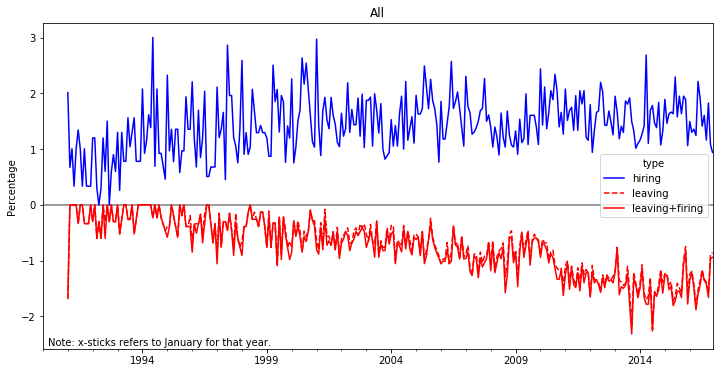

In [16]:
start_year=1990
end_year=2016
for (ticker, grp),ax,xleft in zip(
    prop_by_months.loc[lambda df:(df.month!=0)&(df.year>=start_year)&(df.year<=end_year)].pivot_table(
        index = ['ticker','year','month'], columns='type', values = 'prop', fill_value=0
    ).reset_index().assign(
        **{
            "leaving+firing":lambda df:-(df.leaving+df.firing),
            "leaving":lambda df:-df.leaving,
            "yrmth":lambda df:pd.PeriodIndex(year=df.year,month=df.month,freq='M')
        }
    ).set_index('yrmth').groupby('ticker'),
    iterator_for_axis(), xlefts
):
    grp.loc[lambda df:df.year>=xleft][['hiring','leaving','leaving+firing']].plot(
        ax=ax,title=ticker,style=['b-','r--','r-'],
        xlim=(pd.Period('{}-01'.format(xleft)),pd.Period('{}-12'.format(2016))),
        #xticks=[pd.Period('{}-01'.format(int(x*5+1990))) for x in range(5)]
    )
    ax.set_ylabel('Percentage')
    ax.set_xlabel('')
    ax.hlines(0,pd.Period('{}-01'.format(xleft)),pd.Period('{}-12'.format(2016)),colors='tab:gray')
    ax.annotate("Note: x-sticks refers to January for that year.",(5,3),xycoords="axes points")
plt.show()

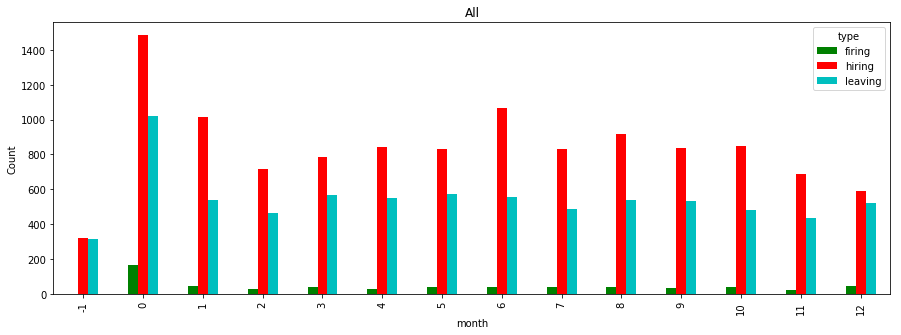

In [17]:
# Month composition.
display(HTML("<center><strong>Month Composition (-1: None, 0: Invalid month)</strong></center>"))
for idx, grp in empl_changes_df.groupby(['ticker']):
    grp.assign(count=1).pivot_table(
        index = 'month', columns = 'type', values='count', aggfunc='sum', fill_value=0
    ).plot.bar(figsize=(15,5),color=color_styles,title=idx).set_ylabel("Count")
    plt.show()

## By birth group.
Note: Birth year `2000` seems to be a trash bin for problematic records and thus will be treated the same as `None`.

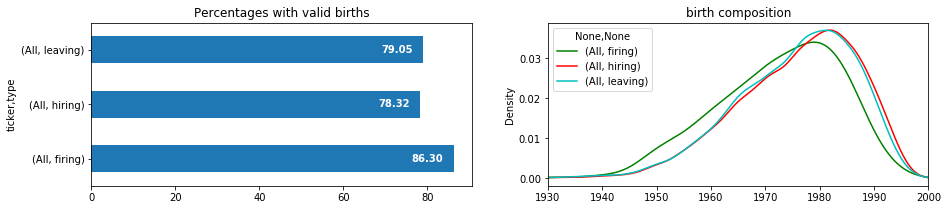

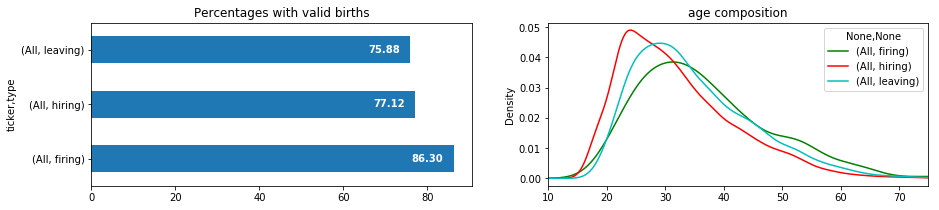

In [18]:
birth_df = empl_changes_df[['ticker','type','year','birth']]
birth_df = birth_df.assign(
    birth = lambda df:df.birth.apply(lambda x:int(x) if x not in ['2000','None'] else np.nan),
    age = lambda df:(df.year-df.birth)
)

# Define a routine to generate plots.
var, xlim = "birth", (1930,2000)
for ticker, grp in birth_df.groupby('ticker'):
    plt.subplots(1,2,figsize=(15,3))
    plt.subplot(121)
    to_plot = grp.groupby(['ticker','type']).apply(lambda df:(df.loc[~df[var].isnull()].size/df.size*100))
    ax = to_plot.plot.barh(title="Percentages with valid births")
    for idx, value in enumerate(to_plot):
        ax.text(value-10,idx-0.05,'{:.2f}'.format(value),color='white',fontweight='bold')
    plt.subplot(122)
    for (idx, group), color in zip(grp.loc[~grp[var].isnull()].groupby(['ticker','type']),color_styles):
        group[var].plot.kde(xlim=xlim,label=idx,title="{} composition".format(var),color=color,legend=True)
    plt.show()
var, xlim = "age", (10,75)
for ticker, grp in birth_df.groupby('ticker'):
    plt.subplots(1,2,figsize=(15,3))
    plt.subplot(121)
    to_plot = grp.groupby(['ticker','type']).apply(lambda df:(df.loc[~df[var].isnull()].size/df.size*100))
    ax = to_plot.plot.barh(title="Percentages with valid births")
    for idx, value in enumerate(to_plot):
        ax.text(value-10,idx-0.05,'{:.2f}'.format(value),color='white',fontweight='bold')
    plt.subplot(122)
    for (idx, group), color in zip(grp.loc[~grp[var].isnull()].groupby(['ticker','type']),color_styles):
        group[var].plot.kde(xlim=xlim,label=idx,title="{} composition".format(var),color=color,legend=True)
    plt.show()

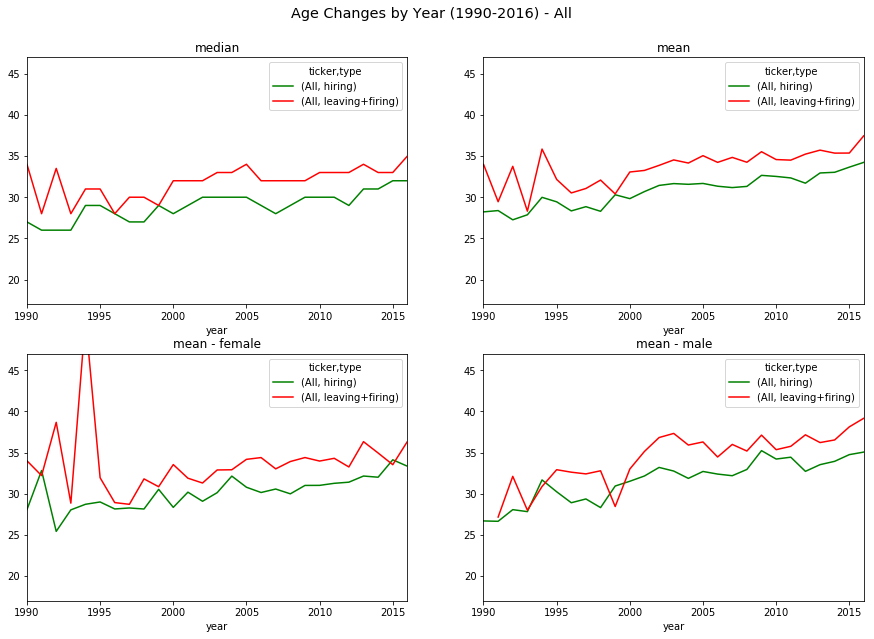

In [19]:
# Age changes by year.
for (ticker, grp), xleft in zip(
    birth_df.replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby('ticker'),
    xlefts
):
    fig, ((ax11, ax12), (ax21, ax22))=plt.subplots(2,2,figsize=(15,10))
    fig.suptitle('Age Changes by Year (1990-2016) - {}'.format(ticker),fontsize='x-large',y=0.95)
    grp.pivot_table(
        index='year',columns=['ticker','type'],values='age',aggfunc='median'
    ).plot(xlim=(xleft,2016),ylim=(17,47),color=color_styles,ax=ax11,title='median')
    grp.pivot_table(
        index='year',columns=['ticker','type'],values='age',aggfunc='mean'
    ).plot(xlim=(xleft,2016),ylim=(17,47),color=color_styles,ax=ax12,title='mean')
    grp.loc[empl_changes_df.gender=='1'].pivot_table(
        index='year',columns=['ticker','type'],values='age',aggfunc='mean'
    ).plot(xlim=(xleft,2016),ylim=(17,47),color=color_styles,ax=ax21,title='mean - female')
    grp.loc[empl_changes_df.gender=='2'].pivot_table(
        index='year',columns=['ticker','type'],values='age',aggfunc='mean'
    ).plot(xlim=(xleft,2016),ylim=(17,47),color=color_styles,ax=ax22,title='mean - male')
    plt.show()

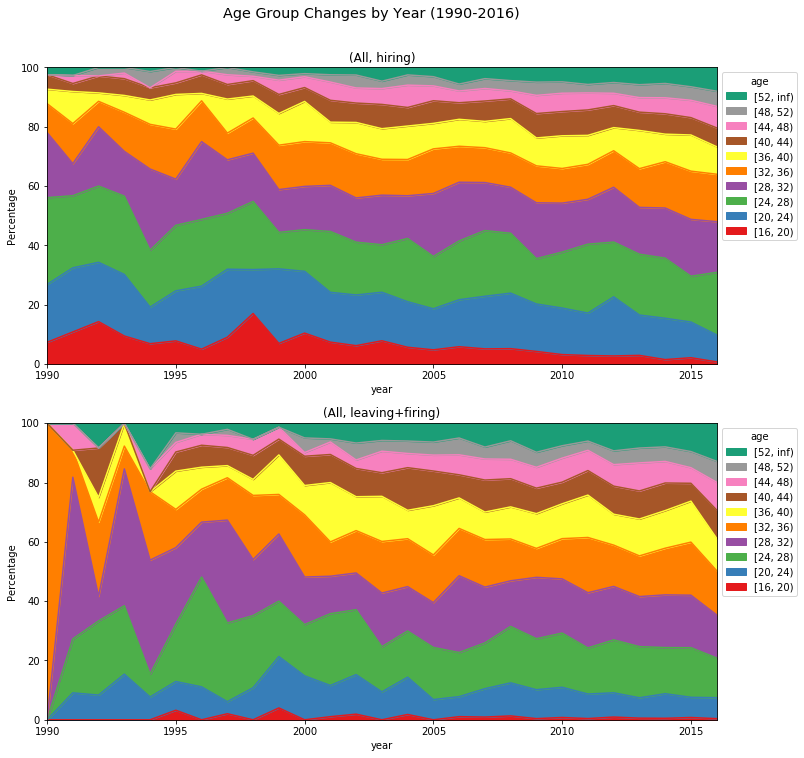

In [20]:
# Age group changes by year.
f_none_hidden = False # Whether to hide the ones out of [16, 52)
bins = list(np.arange(16,55,4))
colormap_unif = list(plt.get_cmap('Set1').colors+plt.get_cmap('Set2').colors+plt.get_cmap('Set3').colors)[:len(bins)-1]
if not f_none_hidden:
    bins = [0]+bins+[np.inf]
    colormap_unif = [plt.get_cmap('Dark2').colors[0]]+colormap_unif+[plt.get_cmap('Dark2').colors[0]]

# Plot composition changes by years.
for (idx, grp), ax, xleft in zip(
    birth_df.loc[
        lambda df:(df.year>=1990)&(df.year<=2016), ['ticker','type','year','age']
    ].replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby(['ticker','type']), iterator_for_axis(
        rep_time=2, fig_func=lambda x:x.suptitle("Age Group Changes by Year (1990-2016)", fontsize='x-large', y=0.95)
    ), [x for x in xlefts for _ in range(2)]
):
    to_plot = grp.assign(count=1).pivot_table(
        index='year', columns=pd.cut(grp.age, bins, right=False, labels=False), values='count', aggfunc='sum', fill_value=0
    ).apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.plot(
        kind='area', ax=ax, ylim=(0,100), title=str(idx).replace("'",""),xlim=(xleft,2016),
        color=[colormap_unif[int(float(i))] for i in to_plot.columns],
        xticks=[1990,1995,2000,2005,2010,2015]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed(handles), ["[{}, {})".format(bins[int(float(x))], bins[int(float(x))+1]) for x in reversed(labels)], 
        loc='upper left',bbox_to_anchor=(1,1),title='age'
    )
plt.show()

## By Gender.

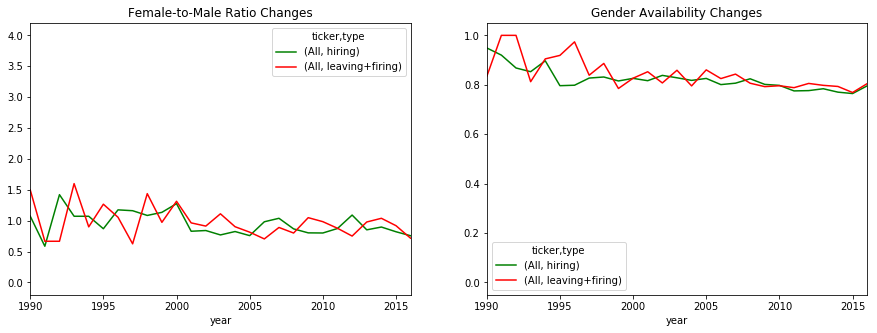

In [21]:
for (ticker, grp), xleft in zip(
    empl_changes_df.replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby('ticker'),
    xlefts
):
    fig, (ax1, ax2)=plt.subplots(1,2,figsize=(15,5))
    grp.pivot_table(
        index='year',columns=['ticker','type'],values='gender',
        aggfunc=lambda x:((x=='1').sum()/(x=='2').sum() if (x=='2').sum() else np.nan)
    ).plot(
        xlim=(xleft,2016),color=color_styles,title="Female-to-Male Ratio Changes",ax=ax1,
        xticks=[1990+5*x for x in range(6)]
    )
    grp.pivot_table(
        index='year',columns=['ticker','type'],values='gender',
        aggfunc=lambda x:((x!='0').sum()/x.size)
    ).plot(
        xlim=(xleft,2016),color=color_styles,title="Gender Availability Changes",ax=ax2,
        xticks=[1990+5*x for x in range(6)]
    )
    plt.show()

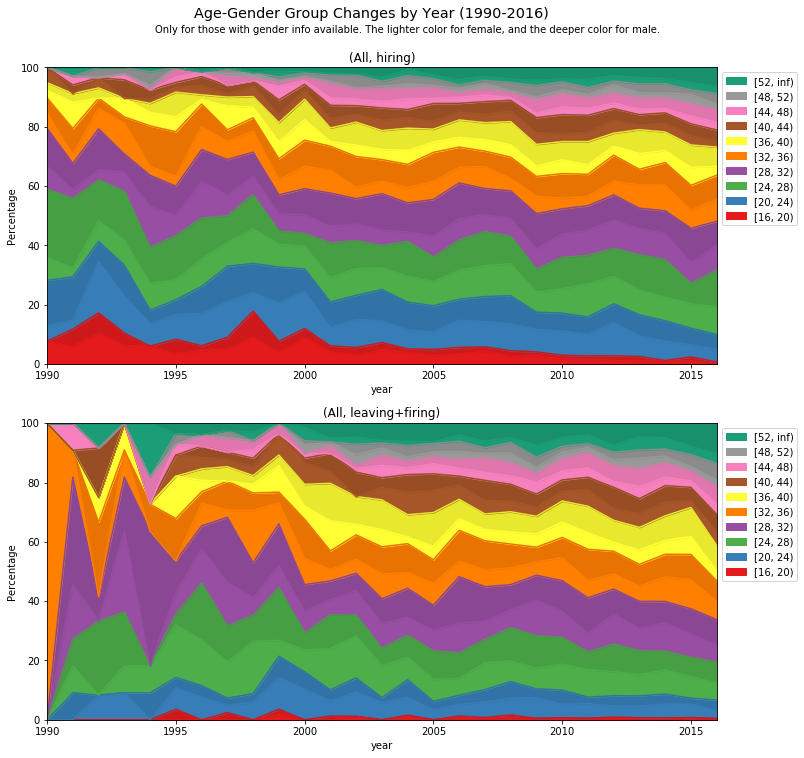

In [22]:
# Age group changes by year.
f_none_hidden = False # Whether to hide the ones out of [16, 52)
bins = list(np.arange(16,55,4))
colormap_unif = list(plt.get_cmap('Set1').colors+plt.get_cmap('Set2').colors+plt.get_cmap('Set3').colors)[:len(bins)-1]
if not f_none_hidden:
    bins = [0]+bins+[np.inf]
    colormap_unif = [plt.get_cmap('Dark2').colors[0]]+colormap_unif+[plt.get_cmap('Dark2').colors[0]]

# Plot composition changes by years.
def fig_func(fig):
    fig.suptitle("Age-Gender Group Changes by Year (1990-2016)", fontsize='x-large', y=0.95)
    fig.text(0.25,0.92,
          "Only for those with gender info available. The lighter color for female, and the deeper color for male.")
for (idx, grp), ax, xleft in zip(
    birth_df.loc[
        lambda df:(df.year>=1990)&(df.year<=2016)&(empl_changes_df.gender!='0'), ['ticker','type','year','age']
    ].replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby(['ticker','type']), iterator_for_axis(
        rep_time=2, fig_func=fig_func
    ), [x for x in xlefts for _ in range(2)]
):
    to_plot = grp.assign(count=1).pivot_table(
        index='year', columns=[pd.cut(grp.age, bins, right=False, labels=False), empl_changes_df.gender], 
        values='count', aggfunc='sum', fill_value=0
    ).apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.plot(
        kind='area', ax=ax, ylim=(0,100), title=str(idx).replace("'",""), 
        xlim=(xleft,2016), xticks=[1990+5*x for x in range(6)],
        color=[
            colormap_unif[int(float(i))] if j=='1' else tuple(t/1.1 for t in colormap_unif[int(float(i))]) 
            for i,j in to_plot.columns
        ]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed([handles[i] for i in range(len(handles)) if i%2==0]), 
        reversed(["[{}, {})".format(bins[int(float(x))], bins[int(float(x))+1]) for x in
            [re.match(r"\((\d+)\.0",labels[i]).group(1) for i in range(len(labels)) if i%2==0]
        ]), 
        loc='upper left',bbox_to_anchor=(1,1)
    )
plt.show()

## By Primary Skill.

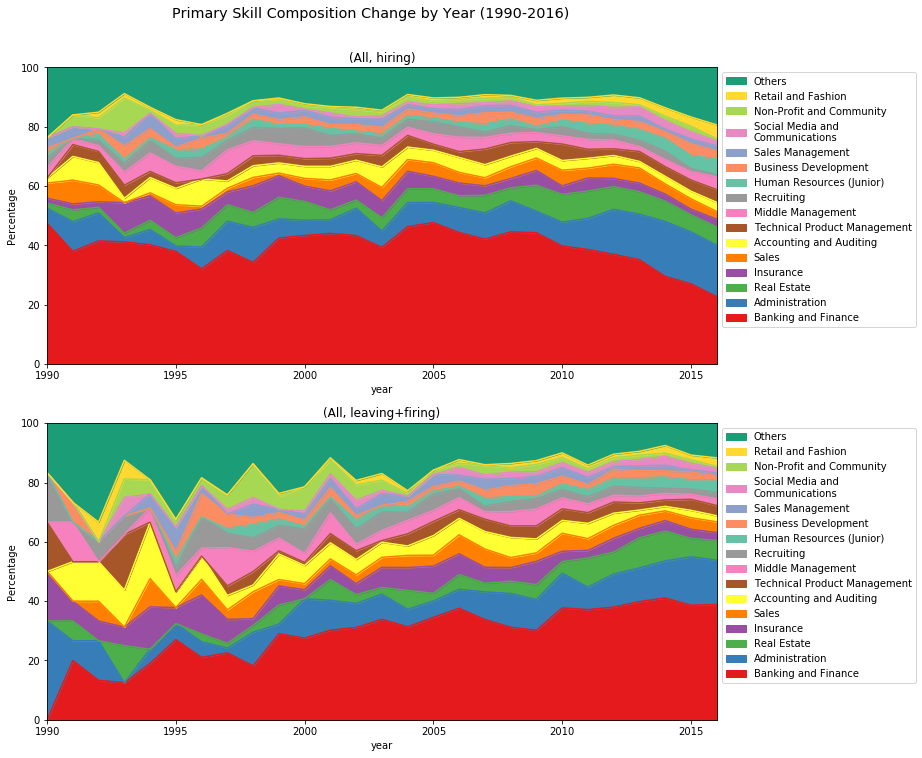

In [23]:
# Create a uniform colormap for all subplots.
skill1_ord_unif = empl_changes_df.groupby('skill1').size().sort_values(ascending=False).index.tolist()
colormap_unif = {idx:clr for idx, clr in zip(
    skill1_ord_unif,
    itertools.cycle(plt.get_cmap('Set1').colors+plt.get_cmap('Set2').colors+plt.get_cmap('Set3').colors)
)}
colormap_unif['Others'] = plt.get_cmap('Dark2').colors[0]

# Codes for showing pie charts:
# fig,axs=plt.subplots(3,2,figsize=(15,22.5))
# fig.suptitle("Secondary Skill Composition",fontsize='x-large')
# for (idx,col),ax in zip(
#     empl_changes_df.loc[:].pivot_table(
#         index='skill1',columns=['ticker','type'],values='gender',aggfunc='count'
#     ).iteritems(), itertools.chain.from_iterable(axs)
# ):
#     to_plot0 = col.sort_values(ascending=False)
#     to_plot = to_plot0.iloc[0:18]
#     to_plot.loc['Others']=to_plot0.sum()-to_plot.sum()  
#     ax=to_plot.plot.pie(
#         ax=ax,labeldistance=1.05,title=str(idx).replace("'",''),autopct='%.2f',pctdistance=0.9,
#         colors = [colormap_unif[idx] for idx in to_plot.index]
#     )
#     ax.set_ylabel('')
# plt.show()

## Continued ##
N_cats = 15 # Number of categories to be shown.

# Plot composition changes by years.
for (idx, grp), ax, xleft in zip(
    empl_changes_df.loc[
        lambda df:(df.year>=1990)&(df.year<=2016), ['ticker','type','year','skill1']
    ].replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby(['ticker','type']), iterator_for_axis(
        rep_time=2, fig_func=lambda x:x.suptitle("Primary Skill Composition Change by Year (1990-2016)", fontsize='x-large', y=0.95)
    ), [x for x in xlefts for _ in range(2)]
):
    to_plot = grp.assign(
        skill1_id = lambda df:[
            {val:(idx if idx<N_cats else N_cats) for idx, val in enumerate(skill1_ord_unif)}[x] for x in df.skill1
        ], count = 1
    ).pivot_table(
        index='year', columns='skill1_id', values='count', aggfunc='sum', fill_value=0 
    ).apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.columns = [skill1_ord_unif[i] if i<N_cats else "Others" for i in to_plot.columns]
    to_plot.plot(
        kind='area', ax=ax, color=[colormap_unif[idx] for idx in to_plot.columns],
        ylim=(0,100), title=str(idx).replace("'",""), 
        xlim=(xleft,2016), xticks=[1990,1995,2000,2005,2010,2015]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed(handles), reversed(['\n'.join(wrap(x,30)) for x in labels]), 
        loc='upper left',bbox_to_anchor=(1,1)
    )
plt.show()

In [24]:
edu_lablst = {
    0:"None/Unknown", 1:"High school", 2:"Vocational degree", 3:"Associates", 
    4:"Bachelors", 5:"Masters excl. MBA", 6:"MBA", 7:"Doctorate (PhD/JD/MD)"
}

# Find representative profiles.
for i in range(5):
    display(HTML("<strong>"+skill1_ord_unif[i]+"</strong>"))
    to_plot = empl_changes_df.assign(edu=lambda df:df.edu.apply(lambda x:edu_lablst[int(x)])).loc[
        lambda df:(df.skill1==skill1_ord_unif[i]),
        ["job_role","depmt","edu","f_elite"]
    ]
    N = to_plot.shape[0]
    # Job role.
    varname = "job_role"
    top10_job_role = pd.DataFrame([v
        for w in to_plot.groupby(varname).size().reset_index().apply(
        lambda x:[[x[varname].split(',')[0].title(),x[0]]]
        #lambda x:[[y.title(),z] for y in x[varname].split(',') for z in [x[0]/(x[varname].count(',')+1)]]
        ,axis=1) for v in w
    ],columns=[varname,"count"]).groupby(varname).sum().reset_index().sort_values(
        "count",ascending=False
    ).head(10).assign(
        prop=lambda df:(df["count"]/N*100).apply(round,ndigits=2)
    ).reset_index(drop=True)#.drop("count",axis=1)
    # Department.
    varname = "depmt"
    to_plot_depmt = to_plot.loc[lambda df:df[varname]!='']
    N_depmt = to_plot_depmt.shape[0]
    top10_depmt = pd.DataFrame([v
        for w in to_plot_depmt.groupby(varname).size().reset_index().apply(
        lambda x:[[y.title(),z] for y in x[varname].split(',') for z in [x[0]/(x[varname].count(',')+1)]]
        ,axis=1) for v in w
    ],columns=[varname,"count"]).replace(
        {varname:{"Tehnology":"Technology"}}
    ).groupby(varname).sum().reset_index().sort_values(
        "count",ascending=False
    ).head(10).assign(
        prop=lambda df:(df["count"]/N_depmt*100).apply(round,ndigits=2)
    ).reset_index(drop=True).drop("count",axis=1)
    # Education.
    top10_edu = to_plot.groupby("edu").size().sort_values(ascending=False).apply(
        lambda x:round(x/N*100,2)).rename("prop").reset_index()
    # show.
    display(HTML("<em>Top 10 entries for each variables with proportions:</em>"))
    display(pd.concat([top10_job_role,top10_depmt,top10_edu], axis=1))
    # Some examples.
    to_plot = to_plot.sample(30)
    display(HTML("<em>Some examples:</em>"))
    display(to_plot)
    

,job_role,count,prop,depmt,prop,edu,prop
0,Personal Banker,303,4.09,Accounting,48.75,Bachelors,52.41
1,Vice President,265,3.57,Marketing,19.33,None/Unknown,23.43
2,Financial Center Manager,199,2.68,Business,15.62,MBA,12.08
3,Customer Service Representative,145,1.96,Oversight,7.02,Masters excl. MBA,5.10
4,Assistant Vice President,105,1.42,Operations,4.81,Associates,3.86
5,Customer Service Manager,100,1.35,Hr,1.97,High school,1.62
6,Branch Manager,91,1.23,Technology,1.19,Doctorate (PhD/JD/MD),1.11
7,Universal Associate,79,1.07,Production,0.80,Vocational degree,0.40
8,Senior Vice President,75,1.01,Legal,0.30,NaN,NaN
9,Relationship Manager,66,0.89,Management,0.20,NaN,NaN


,job_role,depmt,edu,f_elite
14122,"Senior Potfolio Manager,senior,manager",,Bachelors,False
13944,"Client Relations Representative,client,represe...",MARKETING,None/Unknown,False
9353,"Mortgage Loan Officer,loan officer",ACCOUNTING,MBA,False
8285,"Retail Personal Banker,personal banker,retail",MARKETING,MBA,False
16915,Vice President Private Bank Client Engagement ...,"ACCOUNTING,MARKETING",Bachelors,False
10731,"Customer Service Sales Representative,customer...",MARKETING,None/Unknown,False
17145,"Relationship Advisor,advisor",,None/Unknown,False
9914,"Customer Service Representative,customer servi...",MARKETING,Bachelors,False
17269,"Commercial Wine Lender,commercial",BUSINESS,Bachelors,False
13380,"Vice President-Business Banking Group,banking",ACCOUNTING,Bachelors,False


,job_role,count,prop,depmt,prop,edu,prop
0,Customer Service Representative,331,14.86,Marketing,52.36,Bachelors,57.48
1,Personal Banker,140,6.29,Accounting,28.36,None/Unknown,15.99
2,Bank Teller,72,3.23,Business,5.17,Associates,9.03
3,Universal Associate,44,1.98,Operations,4.80,Masters excl. MBA,5.66
4,Csr,40,1.80,Hr,3.57,High school,4.80
5,Teller,39,1.75,Oversight,2.26,MBA,4.18
6,Administrative Assistant,33,1.48,Technology,1.87,Doctorate (PhD/JD/MD),1.62
7,Lead Customer Service Representative,33,1.48,Production,1.05,Vocational degree,1.26
8,Customer Service Manager,30,1.35,Legal,0.54,NaN,NaN
9,Senior Customer Service Representative,20,0.90,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
2267,"Customer Service Representative,customer servi...",MARKETING,Bachelors,False
4390,"Compliance Specialist,specialist",OVERSIGHT,Doctorate (PhD/JD/MD),False
12288,"CSR,customer service representative",,High school,False
2346,"Financial Center Manager II,financial,manager,2",ACCOUNTING,Bachelors,False
11337,"Administrative Assistant,administrative assistant",,MBA,False
11979,"Personal Banker,personal banker",,None/Unknown,False
16801,"Bank Teller,bank teller",ACCOUNTING,Bachelors,False
8592,"Lead CSR,customer service representative,lead",,Associates,False
13298,"Loan Processor,loan processor",ACCOUNTING,Associates,False
19349,"Loan Support Specialist,support,specialist","ACCOUNTING,MARKETING",Bachelors,False


,job_role,count,prop,depmt,prop,edu,prop
0,Mortgage Loan Officer,156,12.46,Accounting,77.07,Bachelors,51.68
1,Mortgage Loan Originator,95,7.59,Marketing,10.95,None/Unknown,32.43
2,Loan Officer,39,3.12,Operations,5.10,Associates,4.15
3,Senior Mortgage Loan Officer,28,2.24,Business,3.56,MBA,3.91
4,Senior Loan Officer,24,1.92,Production,1.19,High school,3.12
5,Personal Banker,21,1.68,Oversight,1.06,Masters excl. MBA,3.04
6,Vice President,18,1.44,Legal,0.64,Doctorate (PhD/JD/MD),1.52
7,Customer Service Representative,17,1.36,Hr,0.28,Vocational degree,0.16
8,Mortgage Banker,15,1.20,Technology,0.16,NaN,NaN
9,Wholesale Account Executive,10,0.80,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
8729,"Customer Service Manager,customer service manager",MARKETING,None/Unknown,False
8214,processor,,Bachelors,False
9752,Emerging Markets Mortgage Loan Originator,ACCOUNTING,MBA,False
6163,"Collections Specialist,collections,specialist",ACCOUNTING,None/Unknown,False
19488,"Senior Loan Officer,loan officer,senior",ACCOUNTING,Bachelors,False
13183,"Customer Service Representative,customer servi...",MARKETING,Bachelors,False
18805,Assistant Vice President/Branch Manager - Home...,ACCOUNTING,Bachelors,False
11520,Loss Mitigation Negotiator,,Bachelors,False
15719,Area Sales Leader-Florida/Easten Georgia Coast...,MARKETING,None/Unknown,False
6184,"Mortgage Loan Officer - Retail Channel,loan of...","ACCOUNTING,MARKETING",Bachelors,False


,job_role,count,prop,depmt,prop,edu,prop
0,Vice President,36,4.44,Accounting,55.20,Bachelors,62.22
1,Licensed Personal Banker,30,3.70,Marketing,23.98,None/Unknown,14.69
2,Investment Executive,26,3.21,Oversight,7.64,MBA,11.23
3,Personal Banker,23,2.84,Hr,5.31,Doctorate (PhD/JD/MD),4.81
4,Financial Advisor,20,2.47,Business,4.37,Masters excl. MBA,3.83
5,Customer Service Representative,19,2.35,Operations,2.84,Associates,1.23
6,Wealth Management Advisor,13,1.60,Technology,0.44,Vocational degree,0.99
7,Office Manager,12,1.48,Legal,0.22,High school,0.99
8,Financial Center Manager,11,1.36,NaN,NaN,NaN,NaN
9,Insurance Specialist,10,1.23,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
6485,"Customer Service Representative,customer servi...",MARKETING,None/Unknown,False
3612,"Vice President,vice president",,Bachelors,False
1291,"Investment Executive,executive",ACCOUNTING,MBA,False
16076,"Insurance Specialist,insurance,specialist",ACCOUNTING,Bachelors,False
2986,Wealth Management Advisor Investment Executive...,ACCOUNTING,Bachelors,False
14938,"Insurance Specialist,insurance,specialist",ACCOUNTING,Bachelors,False
3010,"Vice President & Wealth Mangement Advisor,vice...",,Bachelors,False
13121,"Lisenced Personal Banker,personal banker",,None/Unknown,False
8544,"Retail Personal Banker,personal banker,retail",MARKETING,Bachelors,False
8247,"Licensed Personal Banker,personal banker",,Bachelors,False


,job_role,count,prop,depmt,prop,edu,prop
0,Personal Banker,85,11.33,Marketing,47.77,Bachelors,63.47
1,Customer Service Representative,47,6.27,Accounting,38.95,None/Unknown,18.40
2,Customer Service Manager,23,3.07,Business,7.53,Associates,6.00
3,Financial Center Manager,15,2.00,Hr,2.94,Masters excl. MBA,4.80
4,Dealer Development Representative,15,2.00,Operations,1.87,MBA,3.73
5,Mortgage Loan Originator,13,1.73,Oversight,0.53,High school,2.27
6,Personal Banker Ii,13,1.73,Legal,0.27,Vocational degree,1.07
7,Merchant Account Executive,9,1.20,Management,0.13,Doctorate (PhD/JD/MD),0.27
8,Licensed Personal Banker,9,1.20,NaN,NaN,NaN,NaN
9,Csr,9,1.20,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
7447,"Personal Banker,personal banker",,Bachelors,False
2718,"Customer Services Manager,customer services,ma...","HR,MARKETING",Bachelors,False
2739,"Workflow Coordinator,coordinator",,Bachelors,False
5474,"Sales,sales",MARKETING,Bachelors,False
7459,"Support Employee,support,employee",MARKETING,Associates,False
19581,"Universal Associate,associate",,Bachelors,False
11439,Multi-stage collections,ACCOUNTING,Bachelors,False
4122,"AVP Financial Center Manager,vice president,as...",ACCOUNTING,Bachelors,True
8774,"Office Manager,office manager",,MBA,False
15164,"AVP Relationship manager,vice president,relati...",,Bachelors,False


## By Secondary Skill.
Only for those with their primary skill of "Banking and Finance".

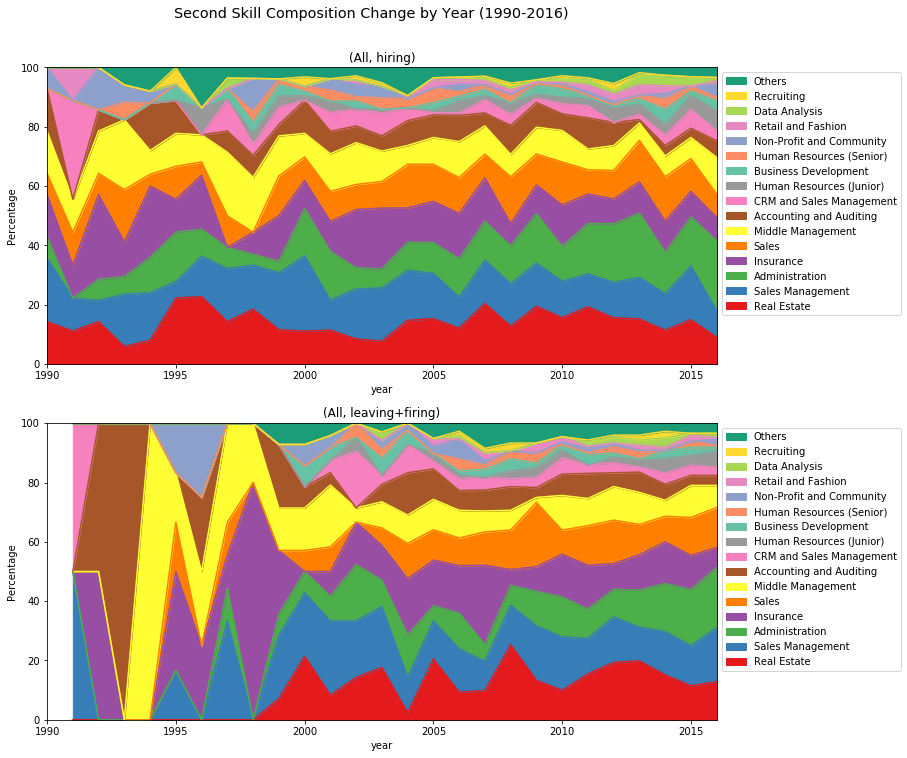

In [25]:
skill2_to_plot = empl_changes_df.loc[lambda df:(df.skill2!='')&(df.skill1=="Banking and Finance")]

# Create a uniform colormap for all subplots.
skill2_ord_unif = skill2_to_plot.groupby('skill2').size().sort_values(ascending=False).index.tolist()
colormap_unif = {idx:clr for idx, clr in zip(
    skill2_ord_unif,
    itertools.cycle(plt.get_cmap('Set1').colors+plt.get_cmap('Set2').colors+plt.get_cmap('Set3').colors)
)}
colormap_unif['Others'] = plt.get_cmap('Dark2').colors[0]

# Codes for showing pie charts:
# fig,axs=plt.subplots(3,2,figsize=(15,22.5))
# fig.suptitle("Secondary Skill Composition",fontsize='x-large')
# for (idx,col),ax in zip(
#     skill2_to_plot.loc[:].pivot_table(
#         index='skill2',columns=['ticker','type'],values='gender',aggfunc='count'
#     ).iteritems(), itertools.chain.from_iterable(axs)
# ):
#     to_plot0 = col.sort_values(ascending=False)
#     to_plot = to_plot0.iloc[0:18]
#     to_plot.loc['Others']=to_plot0.sum()-to_plot.sum()  
#     ax=to_plot.plot.pie(
#         ax=ax,labeldistance=1.05,title=str(idx).replace("'",''),autopct='%.2f',pctdistance=0.9,
#         colors = [colormap_unif[idx] for idx in to_plot.index]
#     )
#     ax.set_ylabel('')
# plt.show()

## Continued ##
N_cats = 15 # Number of categories to be shown.

# Plot composition changes by years.
for (idx, grp), ax, xleft in zip(
    skill2_to_plot.loc[lambda df:df.skill2!=''].loc[
        lambda df:(df.year>=1990)&(df.year<=2016), ['ticker','type','year','skill2']
    ].replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby(['ticker','type']), iterator_for_axis(
        rep_time=2, fig_func=lambda x:x.suptitle("Second Skill Composition Change by Year (1990-2016)", fontsize='x-large', y=0.95)
    ), [x for x in xlefts for _ in range(2)]
):
    to_plot = grp.assign(
        skill2_id = lambda df:[
            {val:(idx if idx<N_cats else N_cats) for idx, val in enumerate(skill2_ord_unif)}[x] for x in df.skill2
        ], count = 1
    ).pivot_table(
        index='year', columns='skill2_id', values='count', aggfunc='sum', fill_value=0 
    ).apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.columns = [skill2_ord_unif[i] if i<N_cats else "Others" for i in to_plot.columns]
    to_plot.plot(
        kind='area', ax=ax, color=[colormap_unif[idx] for idx in to_plot.columns],
        ylim=(0,100), title=str(idx).replace("'",""), 
        xlim=(xleft,2016), xticks=[1990,1995,2000,2005,2010,2015]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed(handles), reversed(['\n'.join(wrap(x,30)) for x in labels]), 
        loc='upper left',bbox_to_anchor=(1,1)
    )
plt.show()

In [26]:
edu_lablst = {
    0:"None/Unknown", 1:"High school", 2:"Vocational degree", 3:"Associates", 
    4:"Bachelors", 5:"Masters excl. MBA", 6:"MBA", 7:"Doctorate (PhD/JD/MD)"
}

# Find representative profiles.
for i in range(5):
    display(HTML("<strong>"+skill2_ord_unif[i]+"</strong>"))
    to_plot = skill2_to_plot.assign(edu=lambda df:df.edu.apply(lambda x:edu_lablst[int(x)])).loc[
        lambda df:(df.skill2==skill2_ord_unif[i]),
        ["job_role","depmt","edu","f_elite"]
    ]
    N = to_plot.shape[0]
    # Job role.
    varname = "job_role"
    top10_job_role = pd.DataFrame([v
        for w in to_plot.groupby(varname).size().reset_index().apply(
        lambda x:[[x[varname].split(',')[0].title(),x[0]]]
        #lambda x:[[y.title(),z] for y in x[varname].split(',') for z in [x[0]/(x[varname].count(',')+1)]]
        ,axis=1) for v in w
    ],columns=[varname,"count"]).groupby(varname).sum().reset_index().sort_values(
        "count",ascending=False
    ).head(10).assign(
        prop=lambda df:(df["count"]/N*100).apply(round,ndigits=2)
    ).reset_index(drop=True)#.drop("count",axis=1)
    # Department.
    varname = "depmt"
    to_plot_depmt = to_plot.loc[lambda df:df[varname]!='']
    N_depmt = to_plot_depmt.shape[0]
    top10_depmt = pd.DataFrame([v
        for w in to_plot_depmt.groupby(varname).size().reset_index().apply(
        lambda x:[[y.title(),z] for y in x[varname].split(',') for z in [x[0]/(x[varname].count(',')+1)]]
        ,axis=1) for v in w
    ],columns=[varname,"count"]).groupby(varname).sum().reset_index().sort_values(
        "count",ascending=False
    ).head(10).assign(
        prop=lambda df:(df["count"]/N_depmt*100).apply(round,ndigits=2)
    ).reset_index(drop=True).drop("count",axis=1)
    # Education.
    top10_edu = to_plot.groupby("edu").size().sort_values(ascending=False).apply(
        lambda x:round(x/N*100,2)).rename("prop").reset_index()
    # show.
    display(HTML("<em>Top 10 entries for each variables with proportions:</em>"))
    display(pd.concat([top10_job_role,top10_depmt,top10_edu], axis=1))
    # Some examples.
    to_plot = to_plot.sample(30).assign(
        job_role=lambda df:df.job_role.apply(lambda x:x.split(",")[0])
    )
    display(HTML("<em>Some examples:</em>"))
    display(to_plot)
    

,job_role,count,prop,depmt,prop,edu,prop
0,Mortgage Loan Officer,43,6.90,Accounting,62.05,Bachelors,52.17
1,Vice President,18,2.89,Business,12.35,None/Unknown,32.26
2,Financial Center Manager,16,2.57,Marketing,11.75,Associates,5.46
3,Universal Associate,14,2.25,Operations,6.92,MBA,5.30
4,Mortgage Loan Originator,13,2.09,Oversight,3.46,Masters excl. MBA,3.05
5,Personal Banker,12,1.93,Production,1.54,Doctorate (PhD/JD/MD),0.96
6,Mortgage Loan Processor,11,1.77,Technology,1.03,High school,0.80
7,Mortgage Underwriter,10,1.61,Legal,0.51,NaN,NaN
8,Assistant Vice President,10,1.61,Management,0.26,NaN,NaN
9,Senior Vice President,9,1.44,Hr,0.13,NaN,NaN


,job_role,depmt,edu,f_elite
2349,?,,Bachelors,False
8521,Licensed Personal Banker,,Bachelors,False
19854,Commercial Loan Officer,"ACCOUNTING,BUSINESS",None/Unknown,False
11523,Branch Manager,,Bachelors,False
17975,Private Bank Operations Advisor,"OPERATIONS,ACCOUNTING",None/Unknown,False
1551,Special Assets Coordinator,,None/Unknown,False
4543,Mortgage processing assistant,ACCOUNTING,None/Unknown,False
5003,Mortgage Loan Officer VP,ACCOUNTING,Bachelors,False
10655,Senior Vice President,,Masters excl. MBA,False
8783,Personal Banker,,Bachelors,False


,job_role,count,prop,depmt,prop,edu,prop
0,Personal Banker,35,5.64,Accounting,56.66,Bachelors,55.39
1,Financial Center Manager,32,5.15,Business,19.47,None/Unknown,18.36
2,Vice President,19,3.06,Marketing,16.54,MBA,15.46
3,Branch Manager,17,2.74,Oversight,2.38,Masters excl. MBA,5.15
4,Assistant Vice President,9,1.45,Operations,2.06,Associates,3.70
5,Banker,8,1.29,Hr,1.59,Vocational degree,0.64
6,Teller,8,1.29,Legal,0.59,High school,0.64
7,Store Manager,6,0.97,Technology,0.41,Doctorate (PhD/JD/MD),0.64
8,Mortgage Loan Originator,6,0.97,Production,0.29,NaN,NaN
9,Customer Service Manager,6,0.97,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
4867,Vice President,,MBA,False
19216,Small Business Relationship Banker/Vice President,,None/Unknown,False
3559,Treasury Management Sales Officer,"ACCOUNTING,MARKETING",Bachelors,False
8756,VP,,None/Unknown,False
15342,Vice President Regional Retail Sales Manager,MARKETING,Bachelors,False
15870,Vice President,,None/Unknown,False
11525,Vice President of Commercial Banking,"ACCOUNTING,BUSINESS",Bachelors,False
11667,Vice President Retail Regional Manager NMLS #7...,MARKETING,MBA,False
7553,Licensed Personal Banker | Investment Represen...,ACCOUNTING,Bachelors,False
8482,Financial Center Manager,ACCOUNTING,None/Unknown,False


,job_role,count,prop,depmt,prop,edu,prop
0,Customer Service Representative,46,7.82,Marketing,42.92,Bachelors,55.27
1,Personal Banker,42,7.14,Accounting,38.05,None/Unknown,23.81
2,Financial Center Manager,13,2.21,Business,10.22,Associates,5.78
3,Universal Associate,12,2.04,Operations,3.46,MBA,4.93
4,Teller,11,1.87,Oversight,3.30,High school,4.42
5,Customer Service Manager,11,1.87,Hr,1.26,Masters excl. MBA,4.25
6,Lead Customer Service Representative,10,1.70,Management,0.31,Vocational degree,1.02
7,Commercial Associate,8,1.36,Production,0.31,Doctorate (PhD/JD/MD),0.51
8,Branch Manager,8,1.36,Technology,0.16,NaN,NaN
9,Lead Teller,8,1.36,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
3149,Title Insurance Closer,ACCOUNTING,None/Unknown,False
13071,Commercial Associate,BUSINESS,Bachelors,False
12188,Customer Service Representative,MARKETING,Bachelors,False
19638,Treasury Management Specialist,ACCOUNTING,Bachelors,False
13811,customer service manager,MARKETING,None/Unknown,False
13914,Commercial Associate,BUSINESS,Bachelors,False
9430,Associate Portfolio Manager Officer,,Bachelors,False
5495,Commercial Account Coordinator,BUSINESS,None/Unknown,False
11837,Customer Service Representative,MARKETING,Bachelors,False
16629,Teller,,Bachelors,False


,job_role,count,prop,depmt,prop,edu,prop
0,Personal Banker,23,4.48,Accounting,47.81,Bachelors,59.26
1,Vice President,20,3.90,Marketing,23.18,None/Unknown,13.84
2,Financial Center Manager,13,2.53,Business,15.23,MBA,12.28
3,Wealth Management Advisor,12,2.34,Oversight,4.94,Masters excl. MBA,5.85
4,Licensed Personal Banker,12,2.34,Hr,3.77,Associates,3.70
5,Customer Service Manager,12,2.34,Operations,3.70,Doctorate (PhD/JD/MD),3.12
6,Assistant Vice President,11,2.14,Technology,0.82,High school,1.95
7,Vice President Middle Market Relationship Manager,8,1.56,Management,0.27,NaN,NaN
8,Branch Manager,8,1.56,Legal,0.14,NaN,NaN
9,Portfolio Manager,8,1.56,Production,0.14,NaN,NaN


,job_role,depmt,edu,f_elite
17658,Assistant Vice President Relationship Manager,,MBA,False
10835,Personal Retail Banker,MARKETING,Bachelors,False
8767,Vice President - ESOP Finance Group,ACCOUNTING,Doctorate (PhD/JD/MD),True
5063,MANAGER,,None/Unknown,False
8645,Investment Advisors Marketing Coordinator,"ACCOUNTING,MARKETING",Bachelors,False
6414,Customer Service Representative,MARKETING,None/Unknown,False
7020,Wealth Planning Analyst,BUSINESS,Bachelors,False
2979,Operations Manager,OPERATIONS,None/Unknown,False
12202,Financial Center Manager,ACCOUNTING,Bachelors,False
2529,Customer Service Specialist,MARKETING,Bachelors,True


,job_role,count,prop,depmt,prop,edu,prop
0,Personal Banker,40,8.44,Accounting,51.96,Bachelors,58.65
1,Financial Center Manager,23,4.85,Marketing,35.36,None/Unknown,22.57
2,Customer Service Manager,18,3.80,Business,7.16,MBA,6.54
3,Customer Service Representative,10,2.11,Hr,2.47,Associates,5.27
4,Assistant Vice President,7,1.48,Operations,1.90,Masters excl. MBA,3.59
5,Branch Manager,6,1.27,Production,1.14,High school,2.32
6,Lead Customer Service Representative,6,1.27,NaN,NaN,Vocational degree,0.63
7,Office Manager,6,1.27,NaN,NaN,Doctorate (PhD/JD/MD),0.42
8,Relationship Manager,5,1.05,NaN,NaN,NaN,NaN
9,Dealer Development Representative,5,1.05,NaN,NaN,NaN,NaN


,job_role,depmt,edu,f_elite
15451,Senior Vice President - SYNOVUS Financial,ACCOUNTING,Bachelors,False
12489,Financial Center Manager III Vice President,ACCOUNTING,Bachelors,False
6111,Lead Customer Service Representative,MARKETING,Bachelors,False
11385,Vice President Regional Sales Manager,MARKETING,Bachelors,False
1396,Assistant Vice President Financial Center Manager,ACCOUNTING,Bachelors,False
5749,Vice President Residential Mortgage Direct Cha...,"OPERATIONS,ACCOUNTING",None/Unknown,False
9352,Mortgage Loan Officer,ACCOUNTING,MBA,False
18324,Universal Associate,,Bachelors,False
14739,Customer Service Representative,MARKETING,Bachelors,False
15042,Account Manager,,Associates,False


## By Country.

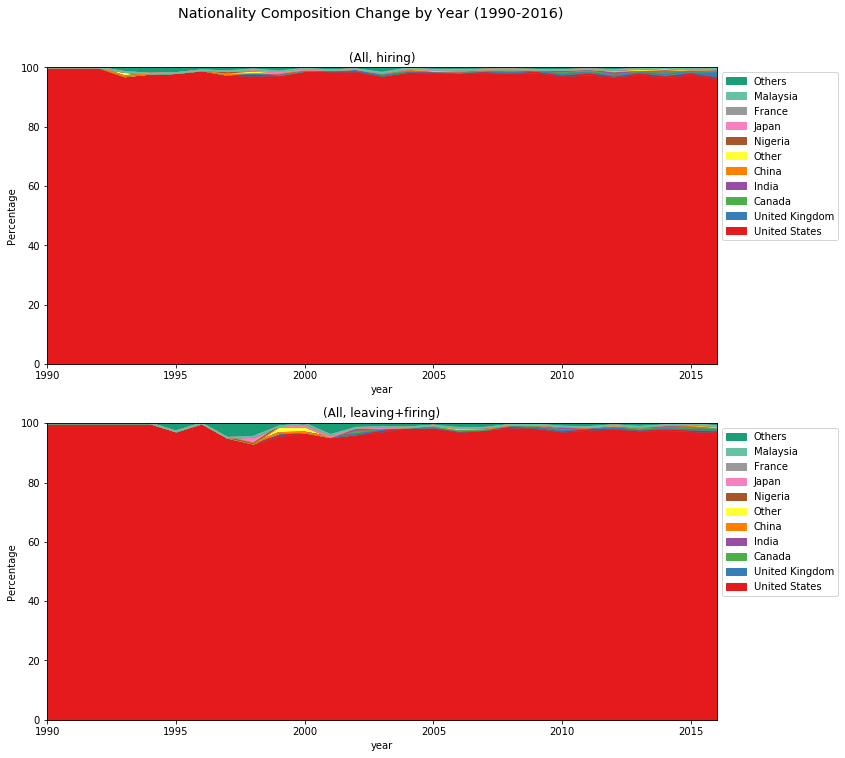

In [27]:
# Create a uniform colormap for all subplots.
cntry_ord_unif = empl_changes_df.groupby('cntry').size().sort_values(ascending=False).index.tolist()
colormap_unif = {idx:clr for idx, clr in zip(
    cntry_ord_unif,
    itertools.cycle(plt.get_cmap('Set1').colors+plt.get_cmap('Set2').colors+plt.get_cmap('Set3').colors)
)}
colormap_unif['Others'] = plt.get_cmap('Dark2').colors[0]

# Codes for showing pie charts:
# fig,axs=plt.subplots(3,2,figsize=(15,22.5))
# for (idx,col),ax in zip(empl_changes_df.loc[:].pivot_table(
#     index='cntry',columns=['ticker','type'],values='gender',aggfunc='count'
# ).iteritems(),itertools.chain.from_iterable(axs)):
#     to_plot0 = col.sort_values(ascending=False)
#     to_plot = to_plot0.iloc[0:28]
#     to_plot.loc['Others']=to_plot0.sum()-to_plot.sum()  
#     to_plot.plot.pie(
#         ax=ax,labeldistance=1.05,title=str(idx).replace("'",''),autopct='%.2f',pctdistance=0.9,rotatelabels=True,
#         color = [colormap_unif[idx] for idx in to_plot.index]
#     )
#     ax.set_ylabel('')
# plt.show()


## Continued ##
N_cats = 10 # Number of categories to be shown.

# Plot composition changes by years.
for (idx, grp), ax, xleft in zip(
    empl_changes_df.loc[
        lambda df:(df.year>=1990)&(df.year<=2016), ['ticker','type','year','cntry']
    ].replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby(['ticker','type']), iterator_for_axis(
        rep_time=2, fig_func=lambda x:x.suptitle("Nationality Composition Change by Year (1990-2016)", fontsize='x-large', y=0.95)
    ), [x for x in xlefts for _ in range(2)]
):
    to_plot = grp.assign(
        cntry_id = lambda df:[
            {val:(idx if idx<N_cats else N_cats) for idx, val in enumerate(cntry_ord_unif)}[x] for x in df.cntry
        ], count = 1
    ).pivot_table(
        index='year', columns='cntry_id', values='count', aggfunc='sum', fill_value=0 
    ).apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.columns = [cntry_ord_unif[i] if i<N_cats else "Others" for i in to_plot.columns]
    to_plot.plot(
        kind='area', ax=ax, color=[colormap_unif[idx] for idx in to_plot.columns],
        ylim=(0,100), title=str(idx).replace("'",""),
        xlim=(xleft,2016),xticks=[1990+x*5 for x in range(6)]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed(handles), reversed(labels), 
        loc='upper left',bbox_to_anchor=(1,1)
    )
plt.show()

## By Education Level.

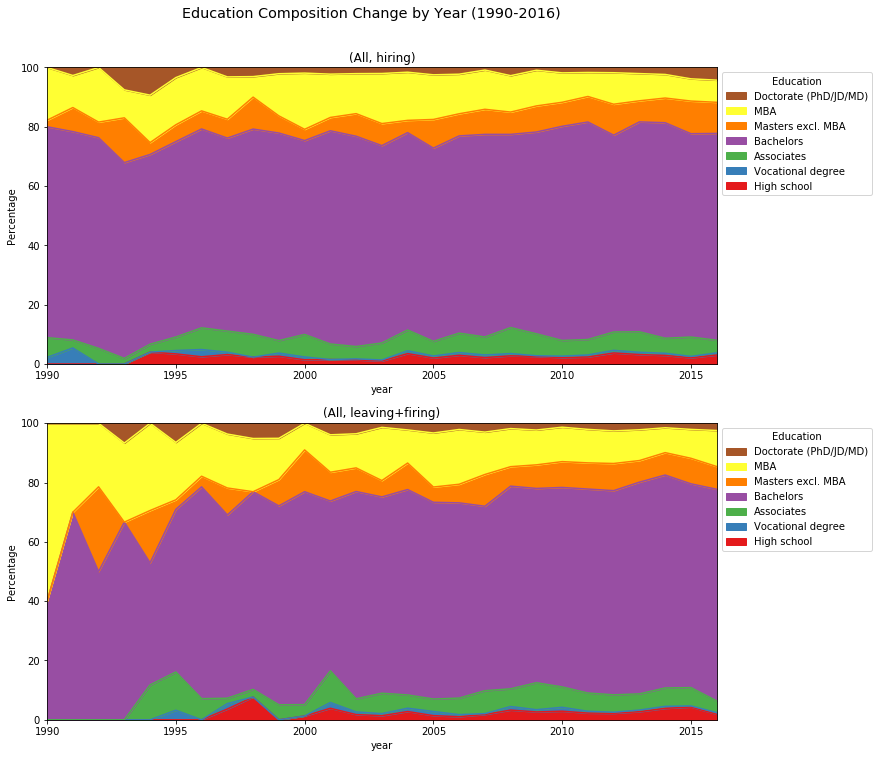

In [28]:
edu_lablst = {
    0:"None/Unknown", 1:"High school", 2:"Vocational degree", 3:"Associates", 
    4:"Bachelors", 5:"Masters excl. MBA", 6:"MBA", 7:"Doctorate (PhD/JD/MD)"
}
colormap_unif = {str(idx):clr for idx, clr in zip(
    range(len(edu_lablst)),
    itertools.cycle([plt.get_cmap('Dark2').colors[0]]+list(plt.get_cmap('Set1').colors))
)}

# Codes for showing pie charts:
# fig,axs=plt.subplots(3,2,figsize=(15,22.5))
# for (idx,col),ax in zip(empl_changes_df.loc[:].pivot_table(
#     index='edu',columns=['ticker','type'],values='gender',aggfunc='count'
# ).iteritems(),itertools.chain.from_iterable(axs)):
#     col.plot.pie(
#         ax=ax, labeldistance=1.05, title=str(idx).replace("'",''), autopct='%.2f', pctdistance=0.9,
#         colors=[colormap_unif[idx] for idx in col.index], labels=[edu_lablst[x] for x in range(0,8)]
#     )
#     ax.set_ylabel('')
# plt.show()

## Continued ##
f_none_hidden = True # Whether to show the "None/Unknown"s.

# Plot composition changes by years.
for (idx, grp), ax, xleft in zip(
    empl_changes_df.loc[
        lambda df:(df.year>=1990)&(df.year<=2016), ['ticker','type','year','edu']
    ].replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby(['ticker','type']), iterator_for_axis(
        rep_time=2,fig_func=lambda x:x.suptitle("Education Composition Change by Year (1990-2016)", fontsize='x-large', y=0.95)
    ), [x for x in xlefts for _ in range(2)]
):
    to_plot = grp.loc[lambda df:[int(x)>=f_none_hidden for x in df.edu]].assign(count = 1).pivot_table(
        index='year', columns='edu', values='count', aggfunc='sum', fill_value=0 
    ).apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.plot(
        kind='area', ax=ax, color=[colormap_unif[idx] for idx in to_plot.columns],
        ylim=(0,100), title=str(idx).replace("'",""),
        xlim=(xleft,2016), xticks=[1990+x*5 for x in range(6)]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed(handles), [edu_lablst[int(x)] for x in reversed(labels)], 
        loc='upper left',bbox_to_anchor=(1,1),title="Education"
    )
plt.show()



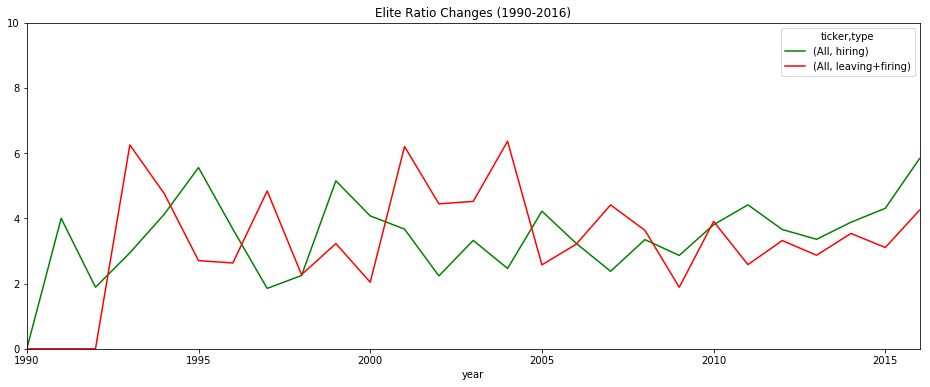

In [29]:
for (ticker, grp), xleft in zip(
    empl_changes_df.replace(
        to_replace={"type":{"firing":"leaving+firing","leaving":"leaving+firing"}}
    ).groupby('ticker'), xlefts
):
    grp.loc[lambda df:df.year>=xleft].pivot_table(
        index='year',columns=['ticker','type'],values='f_elite',
        aggfunc=lambda x:((x=='True').sum()/(x==x).sum()*100)
    ).plot(
        xlim=(1990,2016),color=color_styles,ylim=(0,10),
        title="Elite Ratio Changes (1990-2016)",figsize=(16,6)
    )
    ax.set_ylabel('Percentage')
plt.show()

# By Next Industry.

Note: Division of 2-digit NAICS's into industry groups are obtained from [Bureau of Labor Statistics](https://www.bls.gov/iag/tgs/iag_index_naics.htm).

In [30]:
NAICS2GRP_dict = {
    '11': (1, "Natural Resources and Mining"),
    '21': (1, "Natural Resources and Mining"),
    '23': (2, "Construction"),
    '31': (3, "Manufacturing"),
    '32': (3, "Manufacturing"),
    '33': (3, "Manufacturing"),
    '42': (4, "Trade, Transportation, and Utilities"),
    '44': (4, "Trade, Transportation, and Utilities"),
    '45': (4, "Trade, Transportation, and Utilities"),
    '48': (4, "Trade, Transportation, and Utilities"),
    '49': (4, "Trade, Transportation, and Utilities"),
    '22': (4, "Trade, Transportation, and Utilities"),
    '51': (5, "Information"),
    '52': (6, "Financial Activities"),
    '53': (6, "Financial Activities"),
    '54': (7, "Professional and Business Services"),
    '55': (7, "Professional and Business Services"),
    '56': (7, "Professional and Business Services"),
    '61': (8, "Education and Health Services"),
    '62': (8, "Education and Health Services"),
    '71': (9, "Leisure and Hospitality"),
    '72': (9, "Leisure and Hospitality"),
    '81': (10, "Other Services"),
    '92': (11, "Public Administration"),
    '99': (12, "Unknown/Unclassified"),
    ''  : (12, "Unknown/Unclassified"),
    'MI': (12, "Unknown/Unclassified"),
    '46': (12, "Unknown/Unclassified")
}

# Show the mappings.
pd.DataFrame(
    [[key, value[0], value[1]] for key,value in NAICS2GRP_dict.items()]
).groupby([1,2])[0].apply(lambda ser:', '.join(ser)).reset_index().drop(1,axis=1).rename(
    {2:"Industry group",0:"NAICS2"},axis=1
)

,Industry group,NAICS2
0,Natural Resources and Mining,"11, 21"
1,Construction,23
2,Manufacturing,"31, 32, 33"
3,"Trade, Transportation, and Utilities","42, 44, 45, 48, 49, 22"
4,Information,51
5,Financial Activities,"52, 53"
6,Professional and Business Services,"54, 55, 56"
7,Education and Health Services,"61, 62"
8,Leisure and Hospitality,"71, 72"
9,Other Services,81


Note: `46` seems to be a wrong NAICS2 code.

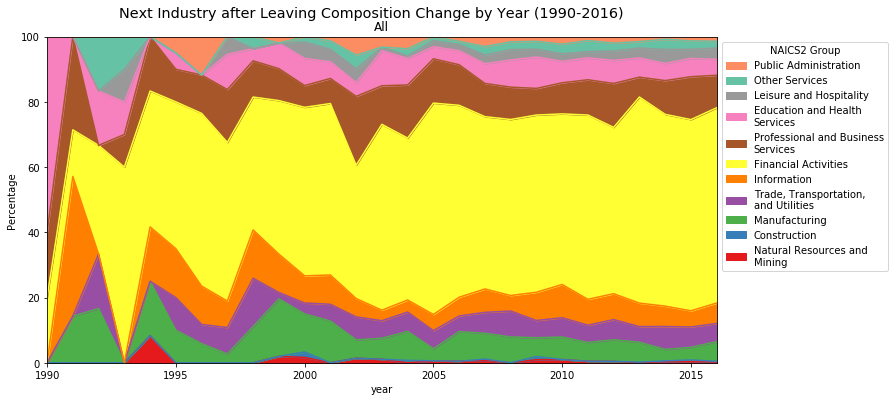

In [31]:
ind_next_lst = sorted(list(set(NAICS2GRP_dict.values())))
colormap_unif = {idx:clr for idx, clr in zip(
    ind_next_lst[:-1], # Assume the last element is "Others".
    itertools.cycle(plt.get_cmap('Set1').colors+plt.get_cmap('Set2').colors+plt.get_cmap('Set3').colors)
)}
colormap_unif[ind_next_lst[-1]] = plt.get_cmap('Dark2').colors[0]

# Codes for showing pie charts:
# fig,axs=plt.subplots(1,2,figsize=(15,7.5))
# for (idx,col),ax in zip(empl_changes_df.loc[lambda df:df.type=='leaving'].pivot_table(
#     index=empl_changes_df.ind_next.apply(lambda x:NAICS2GRP_dict[x[:2]]),
#     columns='ticker', values='gender', aggfunc='count'
# ).iteritems(),axs):
#     col.plot.pie(
#         ax=ax, labeldistance=1.05, title=str(idx).replace("'",''), autopct='%.2f', pctdistance=0.9,
#         colors=[colormap_unif[idx] for idx in col.index], labels=[x[1] for x in col.index]
#     )
#     ax.set_ylabel('')
# plt.show()

## Continued ##
f_none_hidden = True # Whether to show the "None/Unknown"s.

# Plot composition changes by years.
for (idx, grp), ax, xleft in zip(
    empl_changes_df.loc[
        lambda df:(df.year>=1990)&(df.year<=2016)&(df.type=='leaving'), ['ticker','type','year','ind_next']
    ].groupby('ticker'), iterator_for_axis(
        fig_func=lambda x:x.suptitle("Next Industry after Leaving Composition Change by Year (1990-2016)", fontsize='x-large', y=0.95)
    ), xlefts
):
    to_plot = grp.assign(count=1).pivot_table(
        columns=grp.ind_next.apply(lambda x:NAICS2GRP_dict[x[:2]]),
        index='year', values='count', aggfunc='sum', fill_value=0
    )
    if f_none_hidden:
        to_plot.drop(ind_next_lst[-1], axis=1, inplace=True)
    to_plot = to_plot.apply(lambda x:x/sum(x)*100, axis=1)
    to_plot.plot(
        kind='area', ax=ax, color=[colormap_unif[idx] for idx in to_plot.columns],
        ylim=(0,100), title=idx, xlim=(xleft,2016), xticks=[1990,1995,2000,2005,2010,2015]
    )
    ax.set_ylabel("Percentage")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        reversed(handles), ["\n".join(wrap(re.match(r"\(\d+, (.+)\)",x).group(1),25)) for x in reversed(labels)], 
        loc='upper left', bbox_to_anchor=(1,1), title="NAICS2 Group"
    )
plt.show()

## Tenure and Number of Promotions.

Note:
- Tenure = End date of last entry - Start date of first entry in a consecutive sequence of entries in the same company;
 - When there is any invalid month in the two dates and their years are _not_ the same, the invalid month is replaced by 6;
 - When there is any invalid month in the two dates and their years are the same, the invalid month is assumed to be the extreme value (0 for start and 12 for end) and the results are the minimum of their difference and 6.
- Number of promotions = Number of entries in a consecutive sequence of entries in the same company - 1.

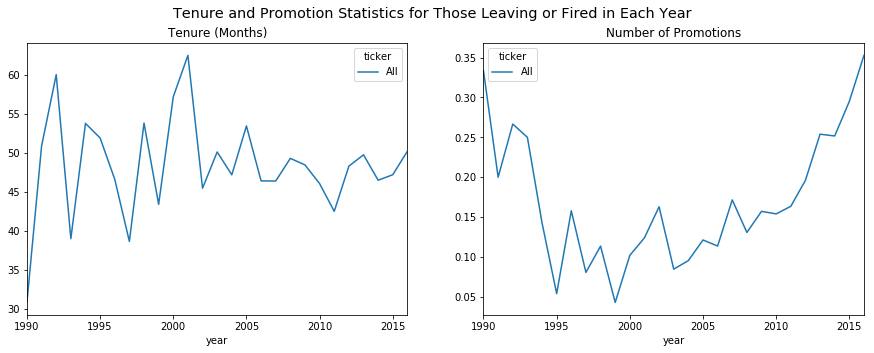

In [32]:
for (ticker, grp), xleft in zip(empl_changes_df.groupby('ticker'),xlefts):
    # Calculate.
    to_plot = grp.loc[lambda df:(df.type!='hiring')&(df.year>=xleft)&(df.year<=2016)].astype(
        {'tenure':'Int64','nprom':'Int64'}
    ).pivot_table(
        columns=['ticker'],index='year',values=['tenure','nprom'],aggfunc=np.nanmean
    )

    # Plot.
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    fig.suptitle("Tenure and Promotion Statistics for Those Leaving or Fired in Each Year",fontsize='x-large')
    to_plot['tenure'].plot(
        title="Tenure (Months)",ax=ax1,xticks=[1990,1995,2000,2005,2010,2015],xlim=(xleft,2016)
    )
    to_plot['nprom'].plot(
        title="Number of Promotions",ax=ax2,xticks=[1990,1995,2000,2005,2010,2015],xlim=(xleft,2016)
    )
plt.show()